<a href="https://colab.research.google.com/github/sujayk96/Person-detection/blob/master/Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Clone Monk Object Detection**

In [1]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git


Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 5105 (delta 60), reused 79 (delta 33), pack-reused 4978
Receiving objects: 100% (5105/5105), 168.36 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (1490/1490), done.
Checking out files: 100% (4720/4720), done.
Cloning into 'monk_v1'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 5750 (delta 17), reused 2 (delta 1), pack-reused 5715
Receiving objects: 100% (5750/5750), 168.03 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (3894/3894), done.
Checking out files: 100% (1313/1313), done.


### Install dependencies 

In [2]:

# For colab use the command below
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


     |████████████████████████████████| 540.1MB 31kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 74kB/s 


### Select Backend and Import Detector

In [3]:
pwd

'/content'

In [3]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");


In [4]:
from detector_prototype import Detector
gtf = Detector()

In [ ]:
import importlib.util
spec = importlib.util.spec_from_file_location("Detector", "kaggle/Monk_Object_Detection/1_gluoncv_finetune/lib/detector_prototype.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
gtf = foo.Detector()

In [5]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 'Monk_Object_Detection/1_gluoncv_finetune/lib/',
 './monk/']

### Set up kaggle and download the Processed Dataset

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jayko2110","key":"140d000db96a64c421531bac9a9a166e"}'}

In [13]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [14]:
!kaggle datasets download -d jayko2110/museum-consolidated

 93% 225M/241M [00:03<00:00, 49.9MB/s]
100% 241M/241M [00:03<00:00, 68.7MB/s]


In [15]:
!unzip -q /content/museum-consolidated.zip


In [16]:
pwd


'/content'

## Define the Detector Network

In [17]:

pretrained = True;         
gpu=True;
model_name = "ssd_512_resnet50_v1_coco";

In [20]:
root = "";                         
img_dir = "/content/images_val/";                                                     
anno_file = "/content/annotations/bbox_val.csv";
batch_size=4;

In [21]:
gtf.Dataset(root,img_dir, anno_file, batch_size=2);


100%|██████████| 2000/2000 [00:01<00:00, 1048.11it/s]


In [22]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);


/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


181189KB [00:06, 28680.02KB/s]                            


In [23]:
gtf.Set_Learning_Rate(0.001);

In [24]:
epochs=4;
params_file = "saved_model.params";

In [25]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.424 samples/sec, CrossEntropy=8.241, SmoothL1=2.102
[Epoch 0][Batch 20], Speed: 9.816 samples/sec, CrossEntropy=4.890, SmoothL1=1.917
[Epoch 0][Batch 40], Speed: 13.092 samples/sec, CrossEntropy=4.170, SmoothL1=2.161
[Epoch 0][Batch 60], Speed: 12.022 samples/sec, CrossEntropy=3.844, SmoothL1=2.275
[Epoch 0][Batch 80], Speed: 11.752 samples/sec, CrossEntropy=3.621, SmoothL1=2.269
[Epoch 0][Batch 100], Speed: 11.023 samples/sec, CrossEntropy=3.493, SmoothL1=2.276
[Epoch 0][Batch 120], Speed: 11.815 samples/sec, CrossEntropy=3.404, SmoothL1=2.290
[Epoch 0][Batch 140], Speed: 11.692 samples/sec, CrossEntropy=3.323, SmoothL1=2.219
[Epoch 0][Batch 160], Speed: 10.957 samples/sec, CrossEntropy=3.294, SmoothL1=2.178
[Epoch 0][Batch 180], Speed: 10.459 samples/sec, CrossEntropy=3.238, SmoothL1=2.133
[Epoch 0][Batch 200], Speed: 11.522 samples/sec, CrossEntropy=3.177, SmoothL1=2.076
[Epoch 0][Batch 220], Speed: 12.005 samples/sec, CrossEntropy=3.133, SmoothL1=2.073


Inference


In [26]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [27]:
from inference_prototype import Infer

In [29]:
model_name = "ssd_512_resnet50_v1_coco";
params_file = "saved_model.params";
class_list = ["person"];

In [30]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [35]:
img_name = "/content/images_train/bg001_fg005_36.jpeg"; 
visualize = True;
thresh = 0.5;

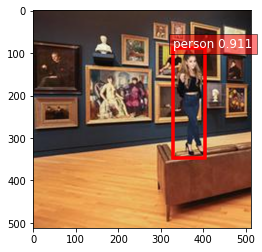

<Figure size 432x288 with 0 Axes>

In [36]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

Further Steps:
- Run IOU on the val dataset. Set a threshold to pass as perfect result. Further calculate Recall and Precision
- Do the following for different params and models


# Additional details:
- While using the Pytorch backend model, CustomDatasetMultiObject class from data_loader_class.py is throwing error for the same data. 

- Additionally, detection_prototype parameter is not uniform across backends, due to which care must be taken while calling the functions.